In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9ba89b9c6c3695c48ae31aa99a3b2e2c9a8e3c9ed6702305c231cecde77e2bc0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv

--2024-03-16 23:44:45--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.001s  

2024-03-16 23:44:45 (48.3 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



In [4]:
dados = pd.read_csv('/content/FuelConsumptionCo2.csv')
dados.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
motores = dados[['ENGINESIZE']]
co2 = dados[['CO2EMISSIONS']]
print (motores)

      ENGINESIZE
0            2.0
1            2.4
2            1.5
3            3.5
4            3.5
...          ...
1062         3.0
1063         3.2
1064         3.0
1065         3.2
1066         3.2

[1067 rows x 1 columns]


In [7]:
motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores, co2, random_state = 42, test_size=0.2)
print (type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


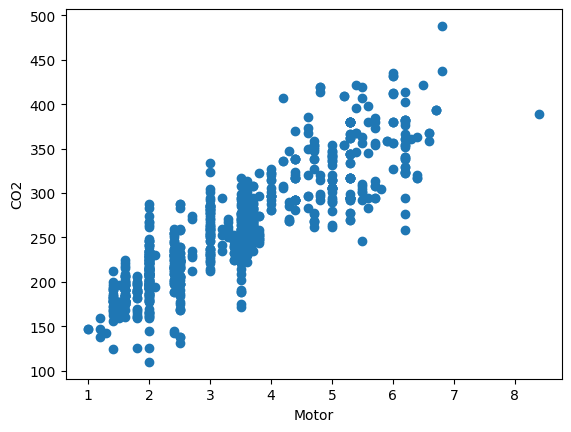

In [8]:
plt.scatter(motores_treino, co2_treino)
plt.xlabel('Motor')
plt.ylabel('CO2')
plt.show()

In [9]:
# Criar modelo de regressão linear

modelo = linear_model.LinearRegression()

# Treinar o modelo usando o DataSet de teste para encontrar o valor de A e B da
# fórmula que gera a linha no gráfico A + Bx

modelo.fit(motores_treino, co2_treino)


LinearRegression()

In [10]:
print (f'A é: {modelo.intercept_}') # Intercepto é onde começa a linha da fórmula
print (f'B é: {modelo.coef_}') #COEF é a inclinação da linha, o ângulo

A é: [126.28970217]
B é: [[38.99297872]]


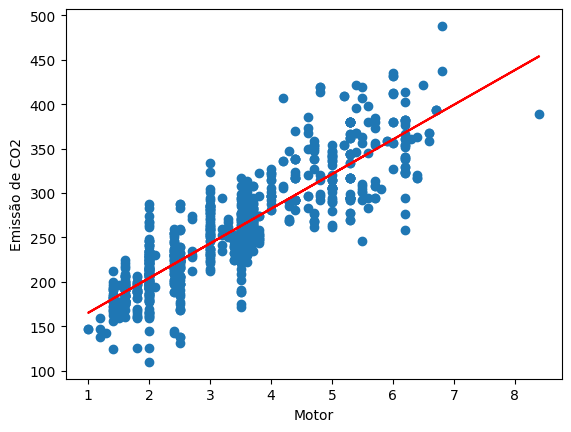

In [11]:
plt.scatter(motores_treino, co2_treino)
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de CO2")
plt.xlabel("Motor")
plt.show()

In [12]:
predicoesCo2 = modelo.predict(motores_teste)

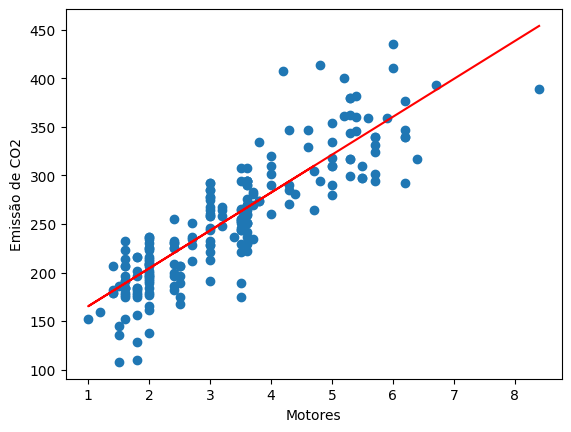

In [13]:
plt.scatter(motores_teste, co2_teste)
plt.plot(motores_teste, modelo.coef_[0][0]*motores_teste + modelo.intercept_[0], '-r')
plt.ylabel('Emissão de CO2')
plt.xlabel('Motores')
plt.show()

In [14]:
# Cálculo das métricas nos dados de teste do modelo

SSE = np.sum((predicoesCo2 - co2_teste)**2)
print (f'A soma dos Erros dos Quadrados (SSE) foi: {SSE}')
MSE = mean_squared_error(co2_teste, predicoesCo2)
print (f'Erro Quadrático Médio (MSE) foi: {MSE:.2f}')
MAE = mean_absolute_error(co2_teste, predicoesCo2)
print (f'Erro Médio Absoluto (MAE) foi: {MAE:.2f}')
RMSE = sqrt(mean_squared_error(co2_teste, predicoesCo2))
print (f'Raiz do Erro Quadrático Médio foi: {RMSE:.2f}')
R2_Score = r2_score(predicoesCo2, co2_teste)
print (f'R2-Score foi: {R2_Score:.2f}')

A soma dos Erros dos Quadrados (SSE) foi: CO2EMISSIONS    210990.768215
dtype: float64
Erro Quadrático Médio (MSE) foi: 985.94
Erro Médio Absoluto (MAE) foi: 24.10
Raiz do Erro Quadrático Médio foi: 31.40
R2-Score foi: 0.68
